In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Download S&P 500 data
data = yf.download('SPY', start='2000-01-01', end='2023-01-01')
returns = data['Close'].pct_change().dropna() * 100  # Daily returns in %



[*********************100%***********************]  1 of 1 completed


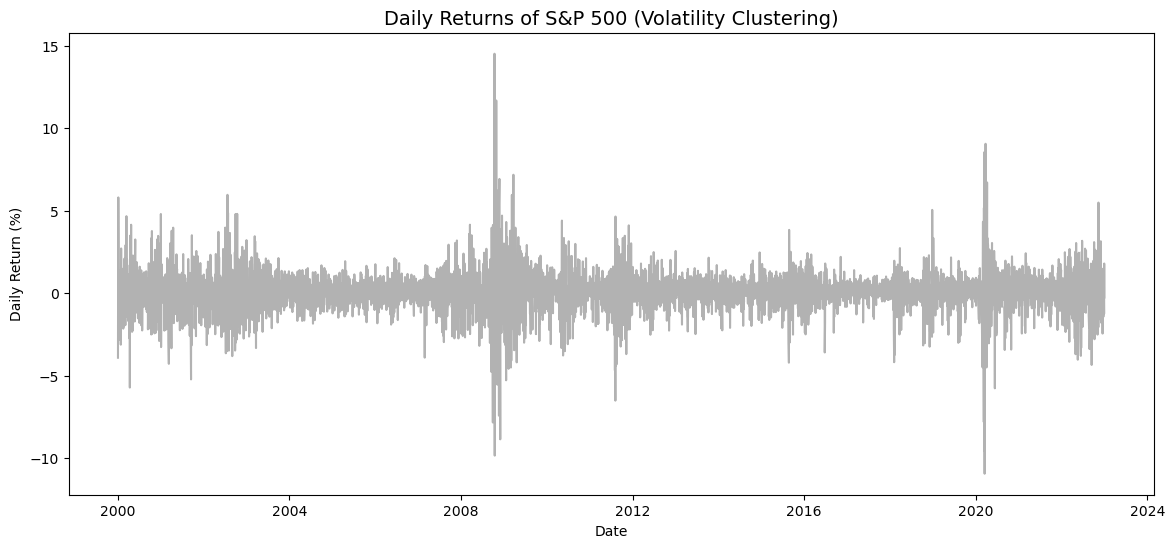

In [6]:
# Plot daily returns (volatility clustering)
plt.figure(figsize=(14, 6))
plt.plot(returns, color='gray', alpha=0.6)
plt.title('Daily Returns of S&P 500 (Volatility Clustering)', fontsize=14)
plt.ylabel('Daily Return (%)')
plt.xlabel('Date')
plt.show()


<Figure size 1400x400 with 0 Axes>

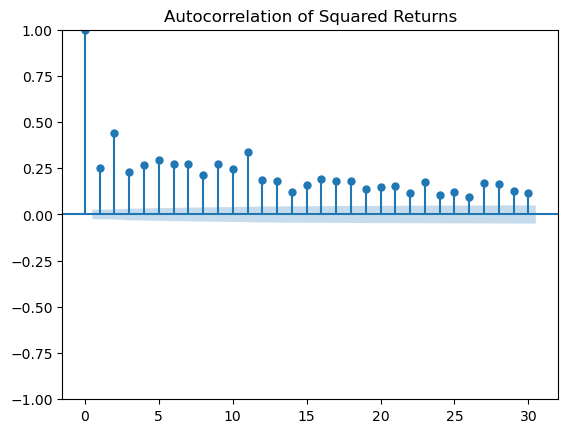

In [7]:

# Autocorrelation of squared returns (volatility persistence)
plt.figure(figsize=(14, 4))
plot_acf(returns**2, lags=30, alpha=0.05, title='Autocorrelation of Squared Returns')
plt.show()


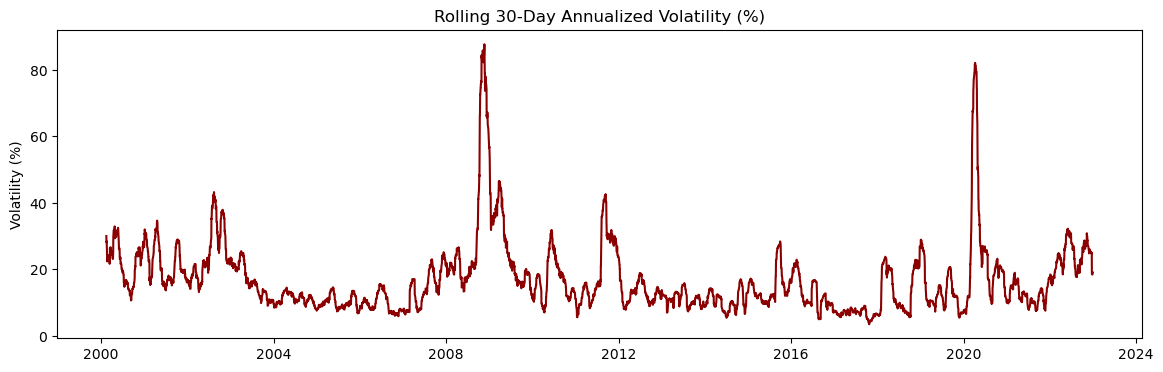

In [8]:

# Rolling 30-day volatility (annualized)
rolling_volatility = returns.rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(14, 4))
plt.plot(rolling_volatility, color='darkred')
plt.title('Rolling 30-Day Annualized Volatility (%)')
plt.ylabel('Volatility (%)')
plt.show()